In [1]:
#%matplotlib notebook
#import aipy
import uvtools
import numpy as np
import pylab as plt
import os
from pathlib import Path
import rfi_hera as rfi

In [2]:
f_rev = 0.02
fqs = np.arange(1345,1420,f_rev)
t_rev = 1.00663293
#lsts = np.arange(0,124544*t_rev,t_rev)
lsts = np.arange(0,1245*t_rev,t_rev)

freqsize = 128
freqstep = 64
timesize = 128
timestep = 64

In [3]:
# Generate Station RFI

In [20]:
stations = [rfi.RfiStation(f0=1355,duty_cycle=1,strength=1,std=0.5,timescale= 100.0),
            rfi.RfiStation(f0=1365,duty_cycle=0.5,strength=1,std=0.9,timescale= 100.0),
            rfi.RfiStation(f0=1375,duty_cycle=0.4,strength=1,std=1,timescale= 100.0),
            rfi.RfiStation(f0=1390,duty_cycle=0.5,strength=1,std=0.7,timescale= 100.0),
            rfi.RfiStation(f0=1400,duty_cycle=0.7,strength=1,std=1,timescale= 100.0),
            rfi.RfiStation(f0=1415,duty_cycle=0.2,strength=1,std=0.5,timescale= 100.0),]

rfi_station1 = rfi.Stations(stations)(freqs=fqs, lsts=lsts, num_channels=30)

rfi_station1 = rfi_station1.T

print(rfi_station1.shape)


(3750, 1245)


In [21]:
# rfi_station_0 = np.absolute(rfi_station1)
# rfi_station_1 = np.real(rfi_station1)
# rfi_station_11= np.where(rfi_station_1 <0, 0 ,rfi_station_1)
# rfi_station_22= np.absolute(rfi_station_1)

rfi_station = np.absolute(rfi_station1)

print(rfi_station.shape)


(3750, 1245)


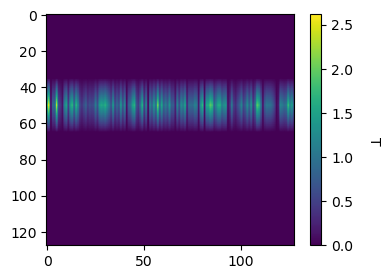

In [22]:
i = 4
j = 6
plt.figure(figsize=[4,3])
hb = plt.imshow(rfi_station[450:578,0:128], aspect = 'auto')
cbar = plt.colorbar(hb)
cbar.set_label(r'T',rotation=270,labelpad=20,y=0.45)

In [81]:
# Generate Impulse RFI

In [23]:
#rfi1_1 = rfi.rfi_impulse(freqs=fqs, lsts=lsts, impulse_chance=.15)
# rfi_impulse_1 = np.real(rfi_impulse1)
# rfi_impulse_11= np.where(rfi_impulse_1 <0, 0 ,rfi_impulse_1)

rfi_impulse0 = rfi.Impulse(impulse_chance=0.015, impulse_strength=2.0)(freqs=fqs, lsts=lsts)

rfi_impulse0 = rfi_impulse0.T

print(rfi_impulse0.shape)

(3750, 1245)


In [24]:
rfi_impulse = np.absolute(rfi_impulse0)

print(rfi_impulse.shape)

(3750, 1245)


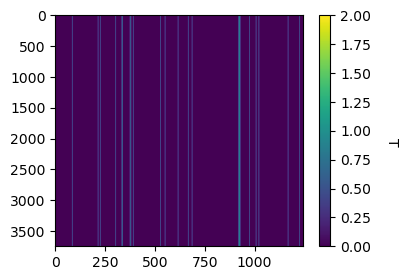

In [25]:
i = 8
j = 11

plt.figure(figsize=[4,3])
# hb = plt.imshow(rfi_impulse[i*freqstep:i*freqstep+freqsize, i*timestep:i*timestep+timesize], aspect = 'auto')
hb = plt.imshow(rfi_impulse, aspect = 'auto')
cbar = plt.colorbar(hb)
cbar.set_label(r'T',rotation=270,labelpad=20,y=0.45)

In [ ]:
# Generate Scatter RFI

In [27]:
rfi_scat0 = rfi.Scatter(scatter_chance=0.003, scatter_strength=1.0, scatter_std=3.0)(freqs=fqs, lsts=lsts)

rfi_scat0 = rfi_scat0.T

print(rfi_scat0.shape)

(3750, 1245)


In [28]:
# rfi_scat00 = np.absolute(rfi_scat0)

rfi_scat1 = np.real(rfi_scat0)

rfi_scat = np.absolute(rfi_scat1)

print(rfi_scat.shape)

(3750, 1245)


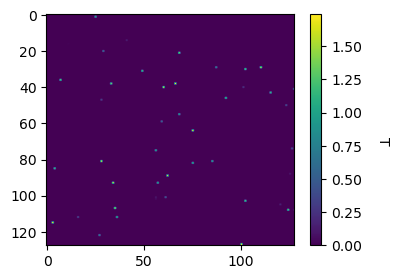

In [29]:
i = 8
j = 11

plt.figure(figsize=[4,3])
hb = plt.imshow(rfi_scat[i*freqstep:i*freqstep+freqsize, i*timestep:i*timestep+timesize], aspect = 'auto')
cbar = plt.colorbar(hb)
cbar.set_label(r'T',rotation=270,labelpad=20,y=0.45)

In [30]:
rfi_all = rfi_station + rfi_impulse + rfi_scat
print(rfi_all.shape)

(3750, 1245)


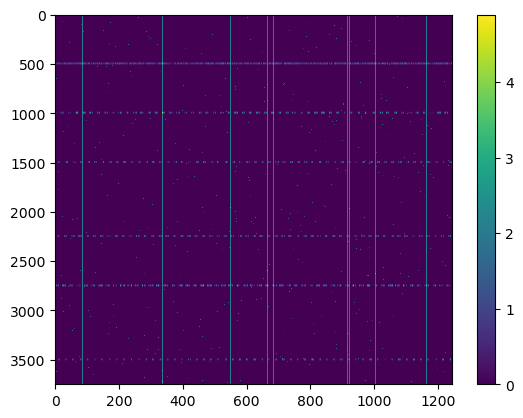

In [31]:
plt.figure()
uvtools.plot.waterfall(rfi_all, mode='real'); plt.colorbar(); #plt.ylim(0,10240)
plt.show()

In [ ]:
savenum = 9

np.save("rfi_sim" + str(savenum) +".npy", rfi_all)

In [ ]:
MX, DRNG = 2.5, 3

plt.figure()
plt.subplot(211); uvtools.plot.waterfall(rfi_all, mode='real'); plt.colorbar(); #plt.ylim(0,10240)
#plt.subplot(211); uvtools.plot.waterfall(rfi_all, mode='real', mx=MX, drng=DRNG); plt.colorbar(); #plt.ylim(0,10240)
plt.subplot(212); uvtools.plot.waterfall(rfi_scat, mode='real'); plt.colorbar(); #plt.ylim(0,1100)
plt.show()

In [ ]:
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(rfi_scat1, mode='real'); plt.colorbar(); #plt.ylim(0,10240)
#plt.subplot(211); uvtools.plot.waterfall(rfi_all, mode='real', mx=MX, drng=DRNG); plt.colorbar(); #plt.ylim(0,10240)
plt.subplot(212); uvtools.plot.waterfall(rfi_scat_2, mode='real'); plt.colorbar(); #plt.ylim(0,1100)
plt.show()

In [59]:
# 生成一个布尔掩码，表示哪些列需要取模
mask = np.random.choice([True, False], rfi_impulse.shape[1])

rfi_impulse0 = np.zeros((rfi_impulse.shape[0],rfi_impulse.shape[1]))

# 使用布尔索引为需要取模的列进行操作
rfi_impulse0[:, mask] = np.abs(rfi_impulse[:, mask])

# 对剩余列使用 np.where 函数，将实部为负数的值设为 0
rfi_impulse0[:, ~mask] = np.abs(rfi_impulse[:, ~mask].real) #np.where(rfi_impulse[:, ~mask].real > 0, rfi_impulse[:, ~mask].real, 0)

In [51]:
rows, cols = rfi_impulse.shape

# 创建一个布尔型随机数组，用于选择哪些列需要取实部的绝对值
bool_array = np.random.choice([True, False], cols)

rfi_impulse0 = np.zeros((rfi_impulse.shape[0],rfi_impulse.shape[1]))
print(rfi_impulse0.shape)

# 根据布尔数组，对每一列应用不同的操作
for i in range(cols):
    if bool_array[i]:
        rfi_impulse0[:, i] = np.where(np.real(rfi_impulse[:,i]) <0, 0 ,np.real(rfi_impulse[:,i])) #np.abs(rfi_impulse[:, i].real)
    else:
        rfi_impulse0[:, i] = np.abs(rfi_impulse[:, i])

#print(rfi_impulse)

(3750, 1245)
